# **Imports**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import datetime
import google.colab

**Reading data from drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

# Reading HRV samples



```
Reading the dataframe
```



In [ ]:
heartrate_df = pd.read_csv("/content/drive/MyDrive/project/heartrate_seconds_merged.csv")

## Understanding the data

In [ ]:
heartrate_df

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101
...,...,...,...
2483653,8877689391,5/12/2016 2:43:53 PM,57
2483654,8877689391,5/12/2016 2:43:58 PM,56
2483655,8877689391,5/12/2016 2:44:03 PM,55
2483656,8877689391,5/12/2016 2:44:18 PM,55


**Cheack if the data is clean**

In [ ]:
print(heartrate_df.isnull().sum())

Id       0
Time     0
Value    0
dtype: int64


**Looks for more info about the data**

In [ ]:
print(heartrate_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB
None


**Analysing all the unique ids**

In [ ]:
num_unique_ids = heartrate_df["Id"].nunique()
print(f"Number of unique Ids: {num_unique_ids}") #prints the number of people

unique_ids = heartrate_df["Id"].unique()
print("Unique Ids:", unique_ids) #prints the ids

#id_counts = heartrate_df["Id"].value_counts().reindex(unique_ids) #how how many rows each person has
id_counts = heartrate_df["Id"].value_counts().sort_values(ascending=False)
print(id_counts)

Number of unique Ids: 14
Unique Ids: [2022484408 2026352035 2347167796 4020332650 4388161847 4558609924
 5553957443 5577150313 6117666160 6775888955 6962181067 7007744171
 8792009665 8877689391]
Id
4020332650    285461
6962181067    266326
5553957443    255174
4388161847    249748
5577150313    248560
8877689391    228841
4558609924    192168
6117666160    158899
2022484408    154104
2347167796    152683
7007744171    133592
8792009665    122841
6775888955     32771
2026352035      2490
Name: count, dtype: int64


## Data organization

### Creates a dataframe for each person

In [ ]:
# Get unique IDs and assign them a number
unique_ids = heartrate_df["Id"].unique()
id_mapping = {id_val: f"p{i+1}" for i, id_val in enumerate(unique_ids)}

# Create sub-DataFrames with new labels
id_dataframes = {id_mapping[id_val]: df for id_val, df in heartrate_df.groupby("Id")}

# Display the mapping of original Ids to new labels
for original_id, new_label in id_mapping.items():
    print(f"{original_id} -> {new_label}")
#id_dataframes["p14"]

2022484408 -> p1
2026352035 -> p2
2347167796 -> p3
4020332650 -> p4
4388161847 -> p5
4558609924 -> p6
5553957443 -> p7
5577150313 -> p8
6117666160 -> p9
6775888955 -> p10
6962181067 -> p11
7007744171 -> p12
8792009665 -> p13
8877689391 -> p14


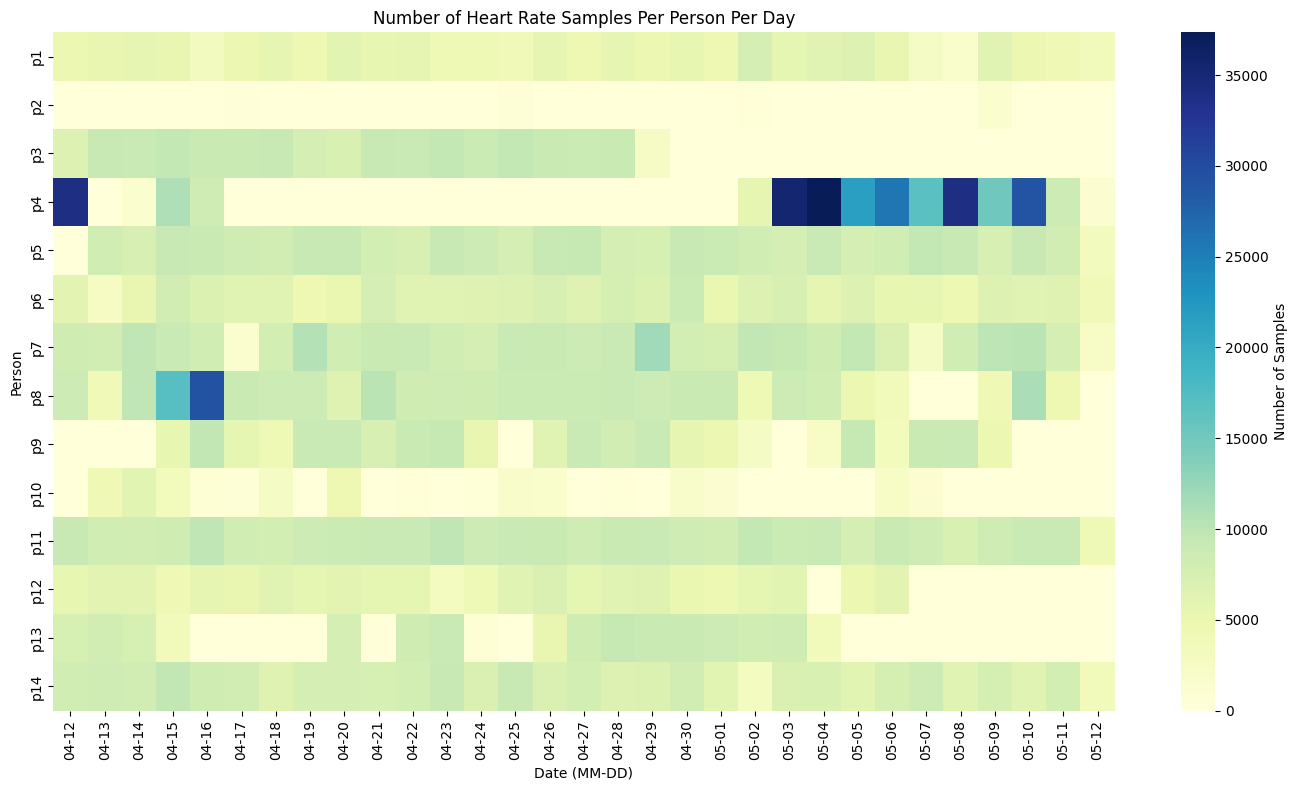

In [ ]:
df = heartrate_df.copy()
df['Time'] = pd.to_datetime(df['Time'])

# Extract date
df['Date'] = df['Time'].dt.date

# Define ID ↔ Person mapping
id_map = {
    2022484408: 'p1',
    2026352035: 'p2',
    2347167796: 'p3',
    4020332650: 'p4',
    4388161847: 'p5',
    4558609924: 'p6',
    5553957443: 'p7',
    5577150313: 'p8',
    6117666160: 'p9',
    6775888955: 'p10',
    6962181067: 'p11',
    7007744171: 'p12',
    8792009665: 'p13',
    8877689391: 'p14'
}

# Print the mapping
#print("ID Person Mapping:")
#for uid, label in id_map.items():
#    print(f"{label}: {uid}")

# Apply mapping to dataset
df['Person'] = df['Id'].map(id_map)
df = df[df['Person'].notna()]  # Keep only mapped users

# Count samples per day per person
user_day_matrix = df.groupby(['Date', 'Person']).size().unstack(fill_value=0)

# Ensure correct person order
ordered_people = [f'p{i}' for i in range(1, 15)]
user_day_matrix = user_day_matrix[ordered_people]

# Reformat index to remove year (show MM-DD only)
user_day_matrix.index = pd.to_datetime(user_day_matrix.index)
user_day_matrix.index = user_day_matrix.index.strftime('%m-%d')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(user_day_matrix.T, cmap="YlGnBu", cbar_kws={'label': 'Number of Samples'})
plt.title("Number of Heart Rate Samples Per Person Per Day")
plt.xlabel("Date (MM-DD)")
plt.ylabel("Person")
plt.tight_layout()
plt.show()



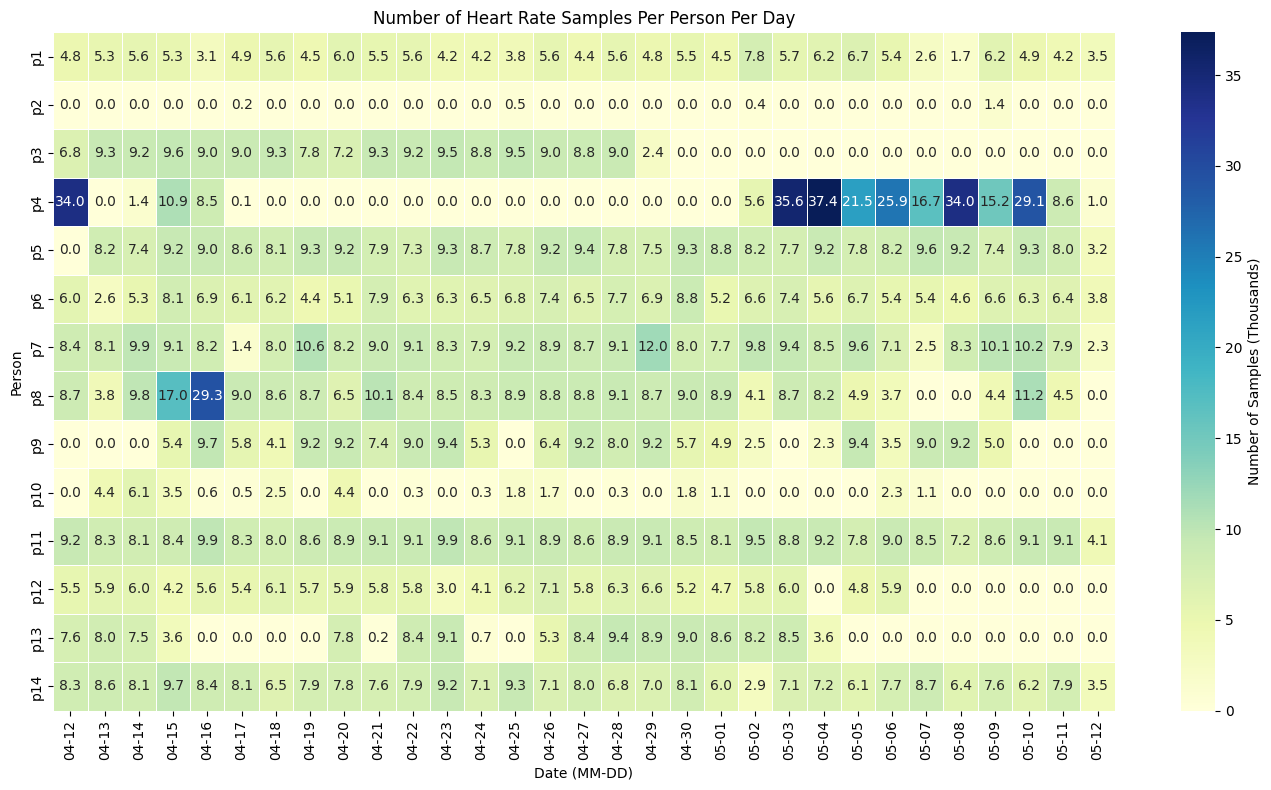

📦 Total Number of Heart Rate Samples per Person:
p4: 285,461 samples (Id: 4020332650)
p11: 266,326 samples (Id: 6962181067)
p7: 255,174 samples (Id: 5553957443)
p5: 249,748 samples (Id: 4388161847)
p8: 248,560 samples (Id: 5577150313)
p14: 228,841 samples (Id: 8877689391)
p6: 192,168 samples (Id: 4558609924)
p9: 158,899 samples (Id: 6117666160)
p1: 154,104 samples (Id: 2022484408)
p3: 152,683 samples (Id: 2347167796)
p12: 133,592 samples (Id: 7007744171)
p13: 122,841 samples (Id: 8792009665)
p10: 32,771 samples (Id: 6775888955)
p2: 2,490 samples (Id: 2026352035)


In [ ]:
# Make a working copy of the original DataFrame
df = heartrate_df.copy()
df['Time'] = pd.to_datetime(df['Time'])

# Extract date
df['Date'] = df['Time'].dt.date

# Define ID ↔ Person mapping
id_map = {
    2022484408: 'p1',
    2026352035: 'p2',
    2347167796: 'p3',
    4020332650: 'p4',
    4388161847: 'p5',
    4558609924: 'p6',
    5553957443: 'p7',
    5577150313: 'p8',
    6117666160: 'p9',
    6775888955: 'p10',
    6962181067: 'p11',
    7007744171: 'p12',
    8792009665: 'p13',
    8877689391: 'p14'
}

# Apply mapping to dataset
df['Person'] = df['Id'].map(id_map)
df = df[df['Person'].notna()]  # Keep only mapped users

# Count samples per day per person
user_day_matrix = df.groupby(['Date', 'Person']).size().unstack(fill_value=0)

# Ensure correct person order
ordered_people = [f'p{i}' for i in range(1, 15)]
user_day_matrix = user_day_matrix[ordered_people]

# Format index to remove year (show MM-DD)
user_day_matrix.index = pd.to_datetime(user_day_matrix.index)
user_day_matrix.index = user_day_matrix.index.strftime('%m-%d')

# ✅ Convert values to thousands for display
display_matrix = user_day_matrix / 1000
annot_labels = display_matrix.round(1).astype(str)

# Plot heatmap with value annotations
plt.figure(figsize=(14, 8))
sns.heatmap(display_matrix.T, cmap="YlGnBu",
            annot=annot_labels.T, fmt="", linewidths=0.5,
            cbar_kws={'label': 'Number of Samples (Thousands)'})
plt.title("Number of Heart Rate Samples Per Person Per Day")
plt.xlabel("Date (MM-DD)")
plt.ylabel("Person")
plt.tight_layout()
plt.show()

# 📊 Print total number of samples per person (sorted)
sample_counts = df['Person'].value_counts().rename_axis('Person').reset_index(name='Total Samples')

# Add original ID back using reverse map
reverse_map = {v: k for k, v in id_map.items()}
sample_counts['Id'] = sample_counts['Person'].map(reverse_map)

# Sort by number of samples
sample_counts = sample_counts.sort_values(by='Total Samples', ascending=False).reset_index(drop=True)

# Print nicely
print("📦 Total Number of Heart Rate Samples per Person:")
for _, row in sample_counts.iterrows():
    print(f"{row['Person']}: {row['Total Samples']:,} samples (Id: {row['Id']})")

### Timing analysis

#### Split into days for each person

In [ ]:
for i in range(1, 15):  # Loop for p1 to p14
    # Create person DataFrame
    globals()[f"p{i}_df"] = id_dataframes[f"p{i}"]

    # Extract and group by Date
    globals()[f"p{i}_days_dataframes"] = {
        date: sub_df for date, sub_df in globals()[f"p{i}_df"]
        .assign(Date=pd.to_datetime(globals()[f"p{i}_df"]["Time"], format="%m/%d/%Y %I:%M:%S %p").dt.date)
        .groupby("Date")
    }

    # Create dynamic variables for df_pn_dayk
    for date, sub_df in globals()[f"p{i}_days_dataframes"].items():
        globals()[f"df_p{i}_day{date.strftime('%Y%m%d')}"] = sub_df

**Code Examples on how to access the data:**

In [ ]:
#How to access the data and read it per-person-per-date: example:
################################################################################

#how to access to all data of person number 1:
#p1_df

################################################################################

#How to read the List of Available Days for a Person:
#p1_days_dataframes ## Dictionary of daily data for person 1

################################################################################

#print(list(p1_days_dataframes.keys()))  # Show available days for person 1

################################################################################

#How to see data of person on a specific date:
#df_p1_day20160412  # Data for person 1 on April 12, 2016

################################################################################


```
# A function to plot the signal for one specific person, on a one specific date:

```



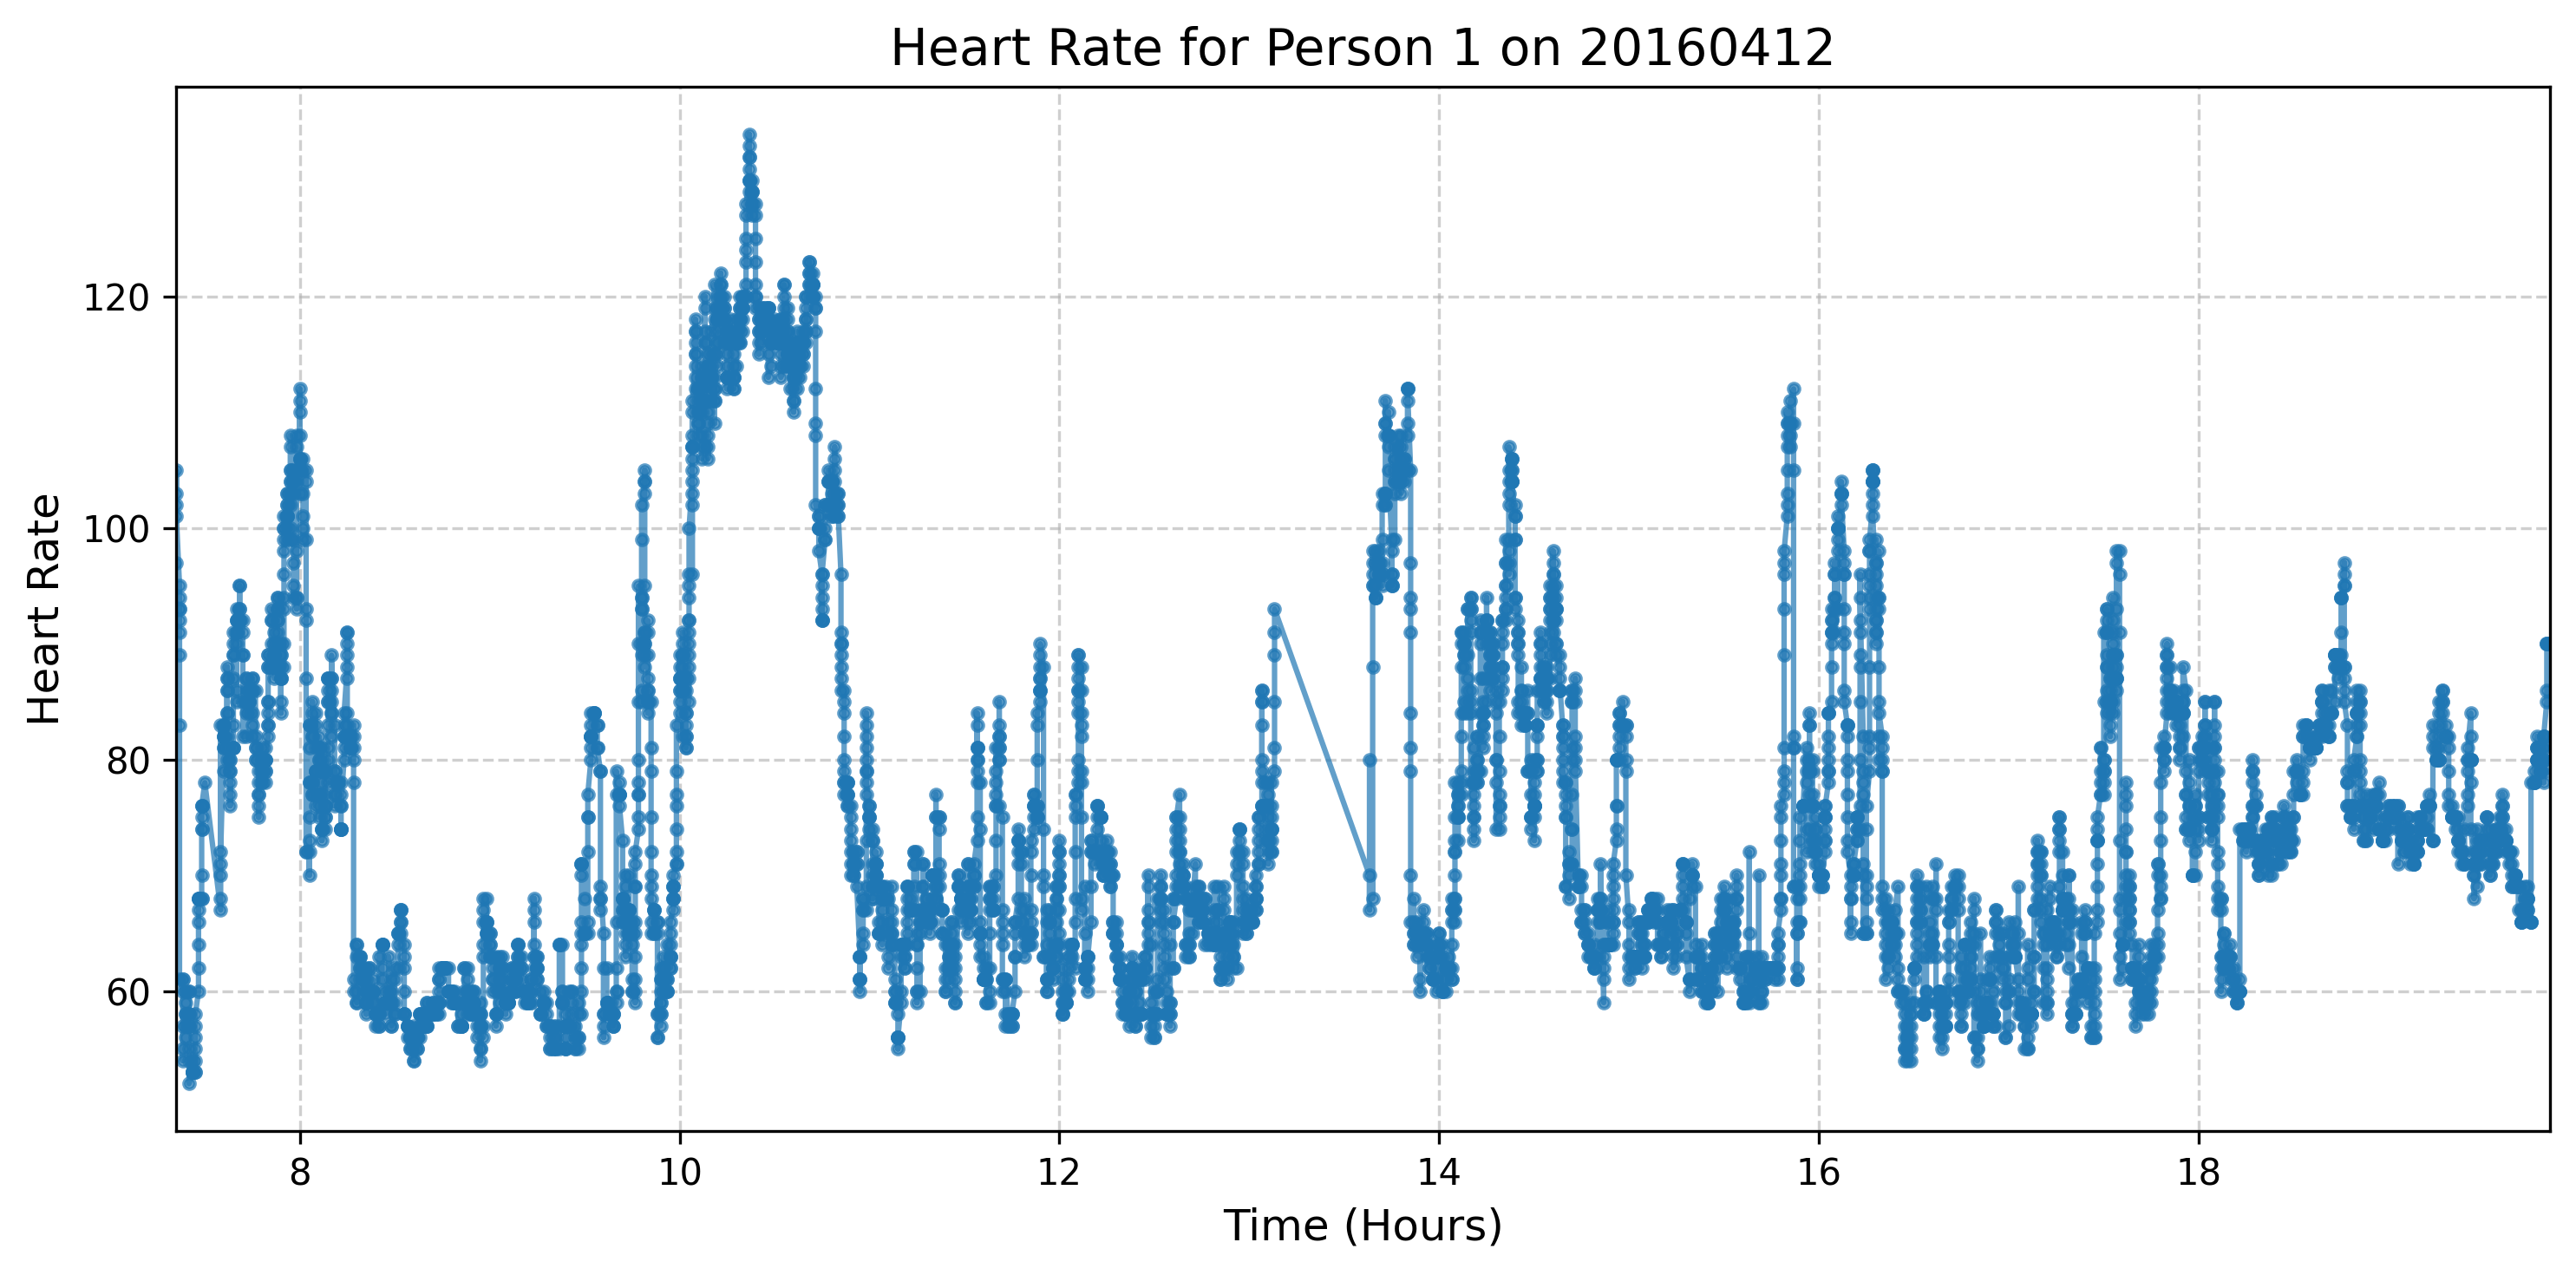

In [ ]:
def plot_heart_rate(n, date_str):
    """
    Plots the heart rate signal for a given person (n) on a specified date (YYYYMMDD)
    with high resolution and zoom functionality.

    Parameters:
        n (int): Person number (1 to 14)
        date_str (str): Date in 'YYYYMMDD' format (e.g., '20160412' for April 12, 2016)
    """
    # Generate the correct key to access the DataFrame
    df_key = f"df_p{n}_day{date_str}"

    # Check if the DataFrame exists in the global scope
    if df_key not in globals():
        print(f"Error: No data available for Person {n} on {date_str}.")
        return

    # Retrieve the DataFrame
    df = globals()[df_key].copy()

    # Check if 'Time' and 'Value' columns exist
    if "Time" not in df.columns or "Value" not in df.columns:
        print(f"Error: Missing 'Time' or 'Value' column in data for Person {n} on {date_str}.")
        return

    # Debugging: Show first few rows
    #print("Initial Data Preview:")
    #print(df.head())

    # Convert 'Time' column to string before parsing
    df["Time"] = df["Time"].astype(str)

    # Convert 'Time' to datetime format
    df["Time"] = pd.to_datetime(df["Time"], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

    # Drop rows where 'Time' couldn't be converted
    df = df.dropna(subset=["Time"])

    # Ensure 'Value' column has valid numeric values
    df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
    df = df.dropna(subset=["Value"])

    # Check if any valid data remains
    if df.empty:
        print(f"Error: No valid time or heart rate data for Person {n} on {date_str}.")
        return

    # Convert 'Time' to numerical format (hours + minutes as decimal)
    df["TimeNum"] = df["Time"].dt.hour + df["Time"].dt.minute / 60

    # Debugging: Show processed data preview
    #print("Processed Data Preview:")
    #print(df.head())

    # Create the plot
    plt.figure(figsize=(10, 5), dpi=300)  # High DPI for clear visuals
    plt.plot(df["TimeNum"], df["Value"], marker="o", linestyle="-", markersize=3, alpha=0.7)

    # Formatting
    plt.title(f"Heart Rate for Person {n} on {date_str}", fontsize=14)
    plt.xlabel("Time (Hours)", fontsize=12)
    plt.ylabel("Heart Rate", fontsize=12)
    plt.xticks(range(0, 25, 2))  # Show x-axis ticks every 2 hours
    plt.grid(True, linestyle="--", alpha=0.6)

    # Set x-axis limits from first to last recorded time
    plt.xlim(df["TimeNum"].min(), df["TimeNum"].max())

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Ensure the plot renders
    plt.show(block=True)

# Example Usage
plot_heart_rate(1, "20160412")  # Plot for Person 1 on April 12, 2016


**Now i'll map for random person, i.e person 1 the hrv in sepcific date that the data looks good, and choose proper-looking time interval of the heart rate signal to start creating simulation input samples**

#### Choosing the right timing interval

##### Plotting for all days for a specific person:

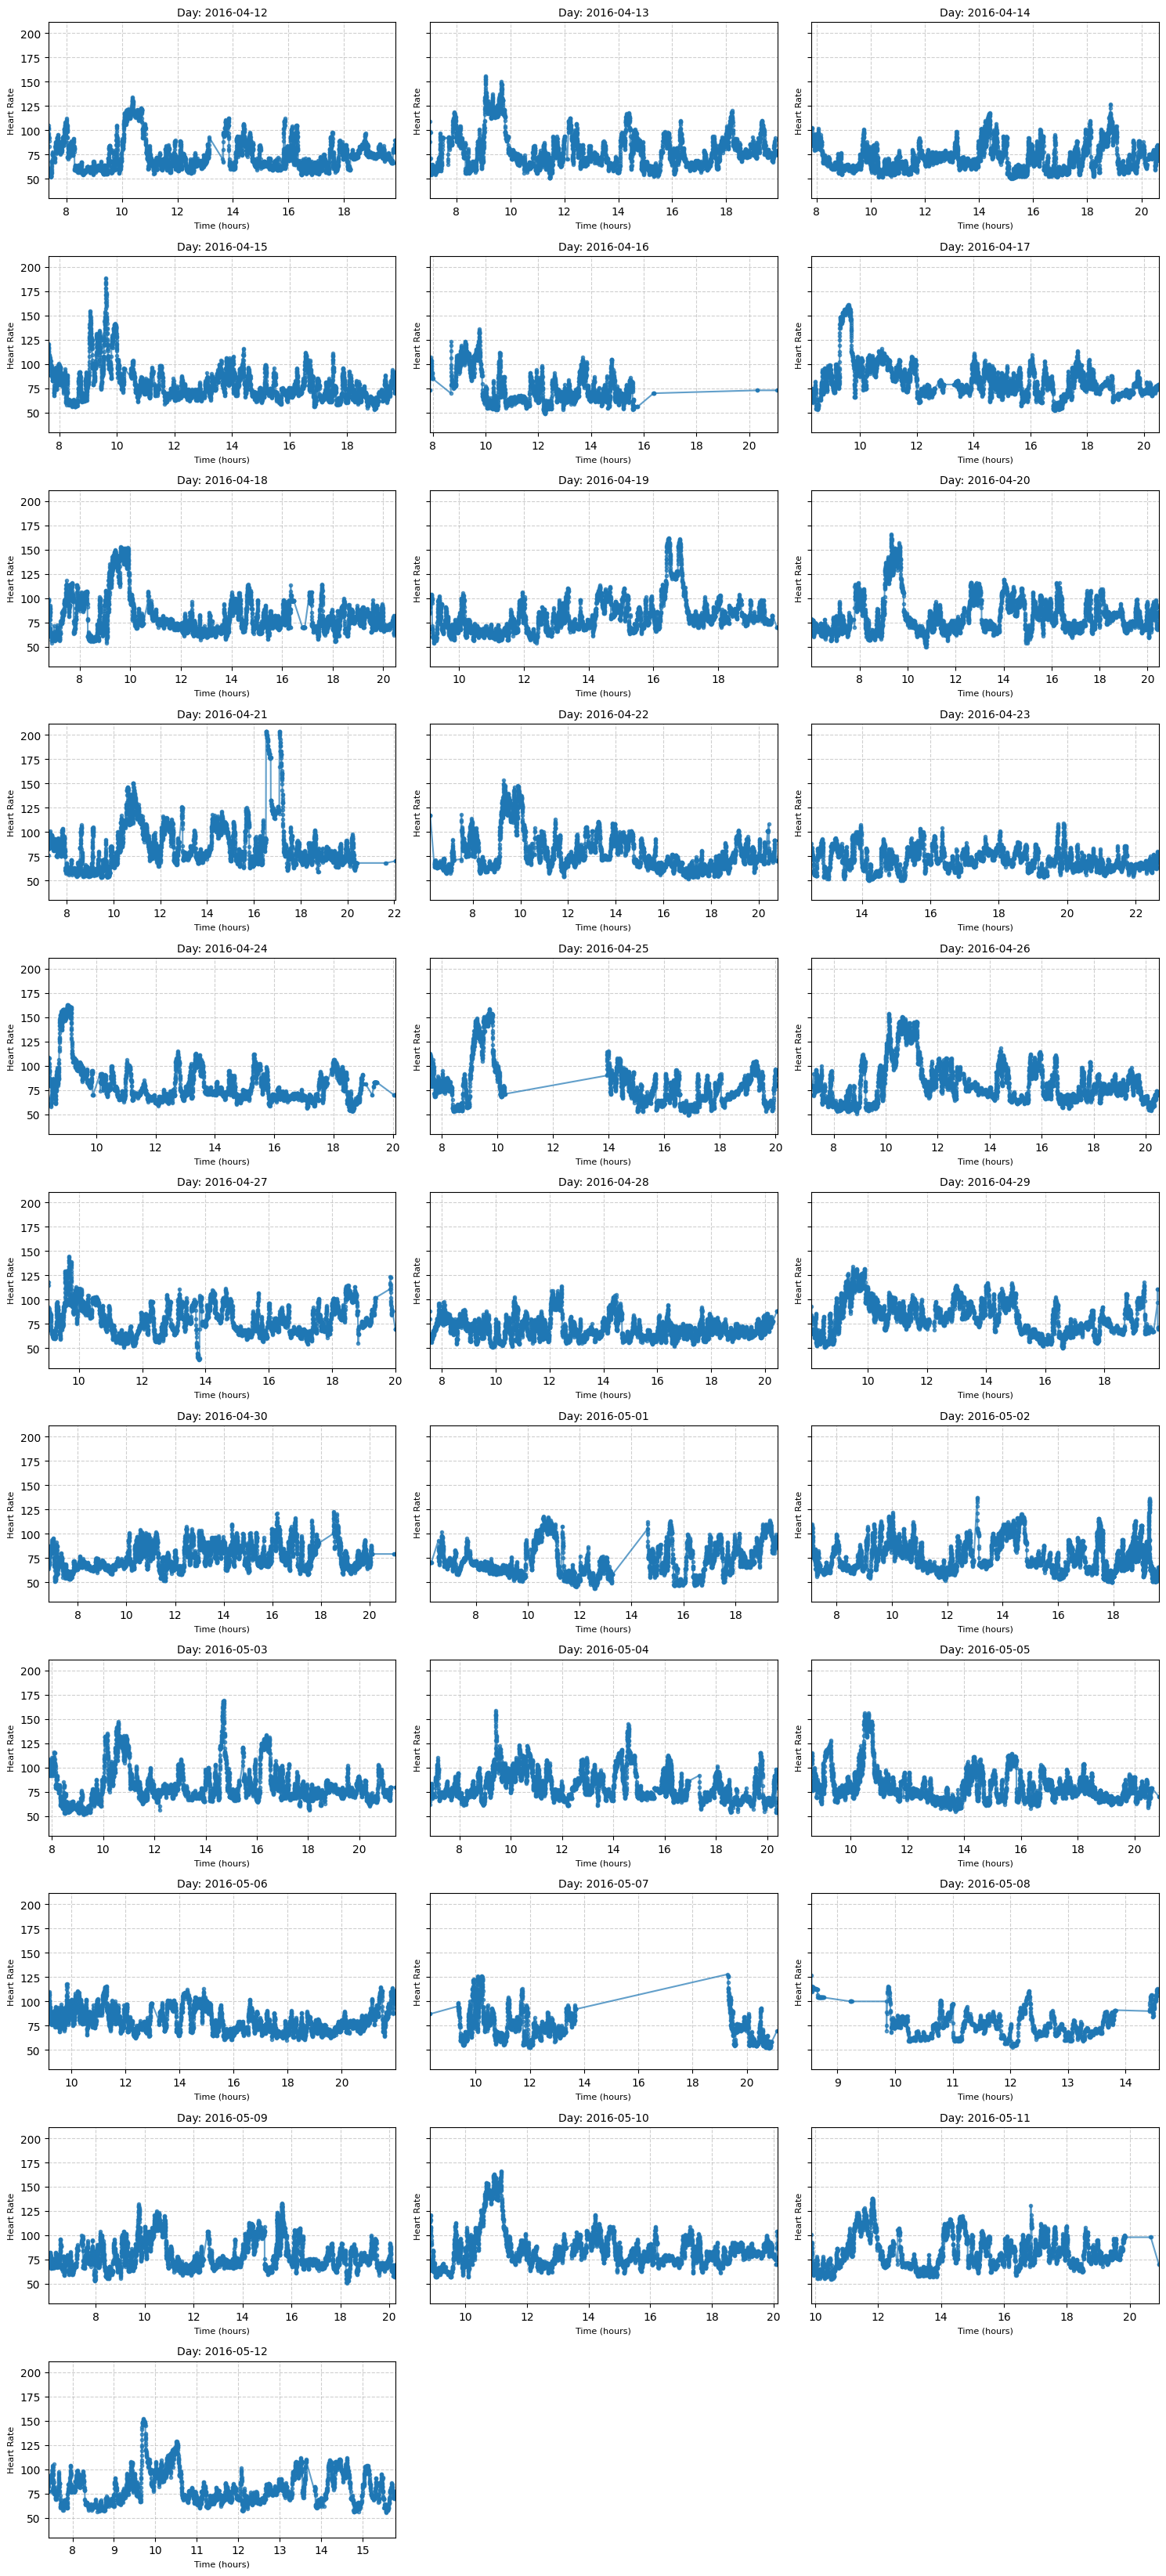

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get all available days for person 1
days_p1 = list(p1_days_dataframes.keys())

# Set up subplots in a grid layout
num_days = len(days_p1)
cols = 3  # Number of columns
rows = -(-num_days // cols)  # Ceiling division to determine rows

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3), sharey=True)
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot heart rate signal for each day
for i, day in enumerate(days_p1):
    day_df = p1_days_dataframes[day].copy()  # Copy to avoid modifying original

    # Convert 'Time' to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(day_df["Time"]):
        day_df["Time"] = pd.to_datetime(day_df["Time"], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

    # Extract time and convert to numerical format (hours since start of day)
    day_df["TimeNum"] = day_df["Time"].dt.hour + day_df["Time"].dt.minute / 60 + day_df["Time"].dt.second / 3600


    axes[i].plot(day_df["TimeNum"], day_df["Value"], marker="o", linestyle="-", markersize=3, alpha=0.7)
    axes[i].set_title(f"Day: {day}", fontsize=10)
    axes[i].set_xlabel("Time (hours)", fontsize=8)  # Updated x-axis label
    axes[i].set_ylabel("Heart Rate", fontsize=8)
    axes[i].grid(True, linestyle="--", alpha=0.6)

    # Dynamically set x-axis limits based on first and last measurement times
    axes[i].set_xlim(day_df["TimeNum"].min(), day_df["TimeNum"].max())


# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

As we can see it's not very good since the data for an entire day has many gaps in it.

##### So Let's try to eximine different time intervals:

In [ ]:
import pandas as pd

def extract_continuous_segments(df, max_time_gap='60s'):  # Changed '60S' to '60s'
    """
    Extracts continuous segments from heart rate data where the time gap
    between consecutive measurements is less than max_time_gap.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Time' and 'Value' columns.
        max_time_gap (str): Maximum allowed time gap between measurements
                            (e.g., '60s' for 60 seconds).

    Returns:
        list: A list of DataFrames, each representing a continuous segment.
    """
    # Convert 'Time' to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df["Time"]):
        df["Time"] = pd.to_datetime(df["Time"], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

    # Calculate time differences between consecutive measurements
    df['TimeDiff'] = df['Time'].diff()

    # Identify breaks where the time gap exceeds max_time_gap
    breaks = df.index[df['TimeDiff'] > pd.Timedelta(max_time_gap)]

    # Split the DataFrame into continuous segments
    segments = []
    start_index = 0
    for break_index in breaks:
        segment = df.iloc[start_index:break_index]
        segments.append(segment)
        start_index = break_index

    # Add the last segment
    segments.append(df.iloc[start_index:])

    # Remove the 'TimeDiff' column from each segment
    segments = [segment.drop(columns=['TimeDiff']) for segment in segments]

    return segments

# Example Usage
# Assuming you have a DataFrame called 'df_p1_day20160412'
continuous_segments = extract_continuous_segments(df_p1_day20160412)

# Accessing the segments:
# continuous_segments[0]  # The first continuous segment
# continuous_segments[1]  # The second continuous segment, and so on
# Assuming 'continuous_segments' contains the list of segments
#Fixed indentation error by removing 3 whitespaces
for i, segment in enumerate(continuous_segments):
    print(f"Segment {i + 1}:")
    print(segment)  # Or print(segment.head()) for a preview
    print("-" * 20)  # Separator between segments

Segment 1:
            Id                Time  Value        Date
0   2022484408 2016-04-12 07:21:00     97  2016-04-12
1   2022484408 2016-04-12 07:21:05    102  2016-04-12
2   2022484408 2016-04-12 07:21:10    105  2016-04-12
3   2022484408 2016-04-12 07:21:20    103  2016-04-12
4   2022484408 2016-04-12 07:21:25    101  2016-04-12
..         ...                 ...    ...         ...
62  2022484408 2016-04-12 07:29:40     76  2016-04-12
63  2022484408 2016-04-12 07:29:45     76  2016-04-12
64  2022484408 2016-04-12 07:29:50     74  2016-04-12
65  2022484408 2016-04-12 07:29:55     76  2016-04-12
66  2022484408 2016-04-12 07:30:00     78  2016-04-12

[67 rows x 4 columns]
--------------------
Segment 2:
              Id                Time  Value        Date
67    2022484408 2016-04-12 07:35:00     67  2016-04-12
68    2022484408 2016-04-12 07:35:05     68  2016-04-12
69    2022484408 2016-04-12 07:35:10     83  2016-04-12
70    2022484408 2016-04-12 07:35:15     70  2016-04-12
71    

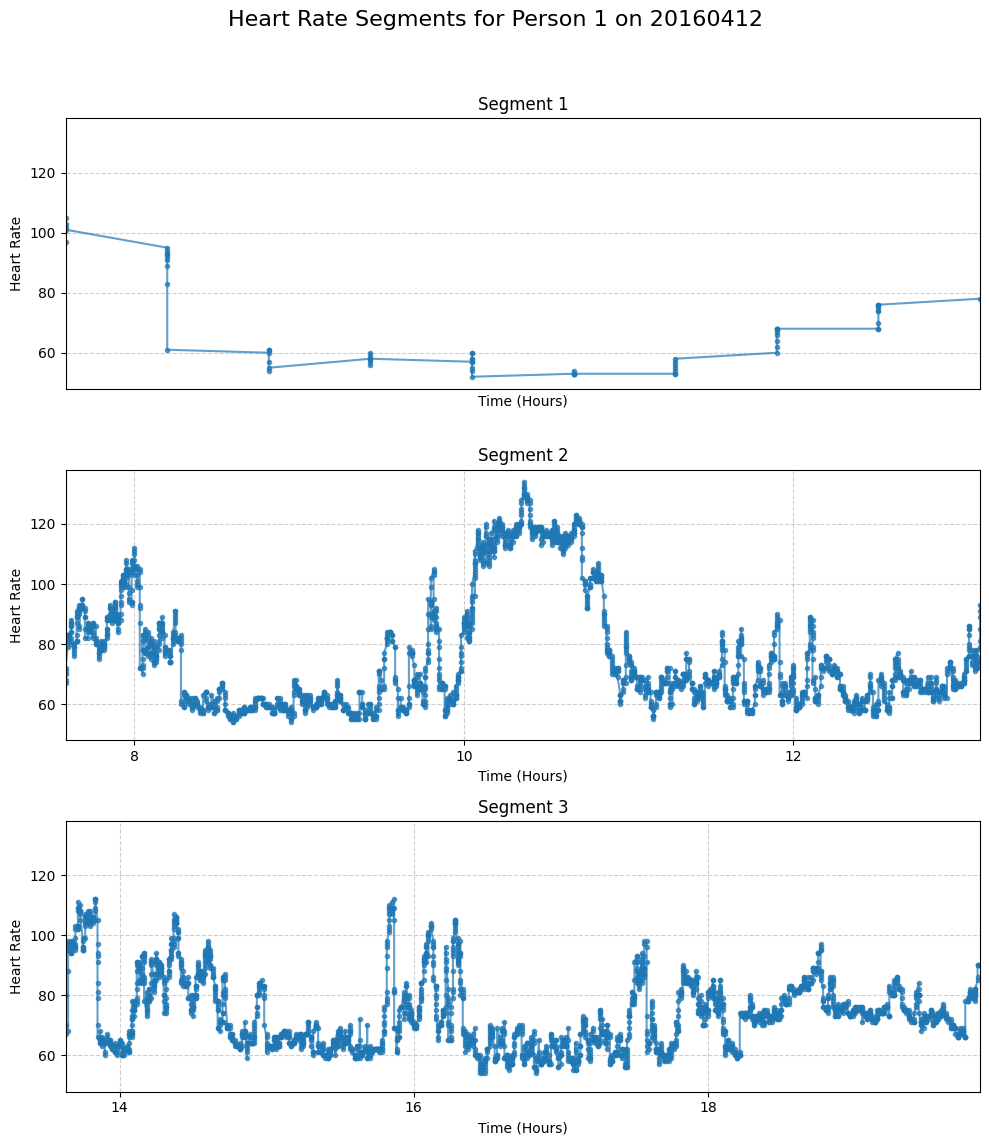

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_heart_rate_segments(segments, person_num, date_str):
    """
    Plots heart rate segments with high resolution and zoom functionality.

    Parameters:
        segments (list): List of DataFrames, each representing a continuous segment.
        person_num (int): Person number (1 to 14).
        date_str (str): Date in 'YYYYMMDD' format (e.g., '20160412').
    """

    num_segments = len(segments)

    # Create subplots to display all segments
    fig, axes = plt.subplots(num_segments, 1, figsize=(10, num_segments * 4), sharex=False, sharey=True)  # Adjust figsize as needed
    fig.suptitle(f"Heart Rate Segments for Person {person_num} on {date_str}", fontsize=16)

    for i, segment in enumerate(segments):
        # Convert 'Time' to datetime and numerical format
        segment["Time"] = pd.to_datetime(segment["Time"], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
        segment["TimeNum"] = segment["Time"].dt.hour + segment["Time"].dt.minute / 60

        # Plot the segment
        ax = axes[i] if num_segments > 1 else axes  # Handle single subplot case
        ax.plot(segment["TimeNum"], segment["Value"], marker="o", linestyle="-", markersize=3, alpha=0.7)

        # Formatting
        ax.set_title(f"Segment {i + 1}", fontsize=12)
        ax.set_xlabel("Time (Hours)", fontsize=10)
        ax.set_ylabel("Heart Rate", fontsize=10)
        ax.set_xticks(range(0, 25, 2))  # Show x-axis ticks every 2 hours
        ax.grid(True, linestyle="--", alpha=0.6)
        ax.set_xlim(segment["TimeNum"].min(), segment["TimeNum"].max())  # Set x-axis limits

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid title overlap
    plt.show()

# Example Usage:
continuous_segments = extract_continuous_segments(df_p1_day20160412)
plot_heart_rate_segments(continuous_segments, 1, "20160412")  # Plot for Person 1 on April 12, 2016

##### Create 2 min samples:

In [ ]:
def create_2min_samples(segments, sample_duration='2min', overlap='1min'):
    """
    Creates 2-minute overlapping samples from continuous heart rate segments.

    Parameters:
        segments (list): List of DataFrames, each representing a continuous segment.
        sample_duration (str): Duration of each sample (default: '2min').
        overlap (str): Overlap between consecutive samples (default: '1min').

    Returns:
        list: A list of DataFrames, each representing a 2-minute sample.
    """
    all_samples = []
    sample_duration_td = pd.Timedelta(sample_duration)
    overlap_td = pd.Timedelta(overlap)

    for segment in segments:
        if segment.empty or 'Time' not in segment.columns:
            continue  # Skip empty or malformed segments

        # Convert 'Time' to datetime if necessary
        if not pd.api.types.is_datetime64_any_dtype(segment["Time"]):
            segment["Time"] = pd.to_datetime(segment["Time"], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

        # Drop rows with invalid timestamps
        segment = segment.dropna(subset=["Time"])

        # Ensure segment has enough data
        if len(segment) < 10:
            continue

        # Calculate segment duration
        segment_start = segment["Time"].min()
        segment_end = segment["Time"].max()
        segment_duration_seconds = (segment_end - segment_start).total_seconds()

        # Skip segments shorter than the sample duration
        if segment_duration_seconds < sample_duration_td.total_seconds():
            continue

        # Calculate number of samples
        num_samples = int((segment_duration_seconds - sample_duration_td.total_seconds()) / overlap_td.total_seconds()) + 1

        # Extract samples using a sliding window
        for i in range(num_samples):
            start_time = segment_start + i * overlap_td
            end_time = start_time + sample_duration_td
            sample = segment[(segment["Time"] >= start_time) & (segment["Time"] < end_time)]

            if len(sample) >= 10:  # Ensure sample has sufficient data points
                all_samples.append(sample)

    return all_samples

# Example usage:
continuous_segments = extract_continuous_segments(df_p1_day20160412)
samples = create_2min_samples(continuous_segments)

# Accessing extracted samples:
samples[0]  # First 2-minute sample
samples[1]  # Second 2-minute sample


,Id,Time,Value,Date
5,2022484408,2016-04-12 07:22:05,95,2016-04-12
6,2022484408,2016-04-12 07:22:10,91,2016-04-12
7,2022484408,2016-04-12 07:22:15,93,2016-04-12
8,2022484408,2016-04-12 07:22:20,94,2016-04-12
9,2022484408,2016-04-12 07:22:25,93,2016-04-12
10,2022484408,2016-04-12 07:22:35,92,2016-04-12
11,2022484408,2016-04-12 07:22:40,89,2016-04-12
12,2022484408,2016-04-12 07:22:50,83,2016-04-12
13,2022484408,2016-04-12 07:22:55,61,2016-04-12
14,2022484408,2016-04-12 07:23:00,60,2016-04-12



```
And plots them:

```



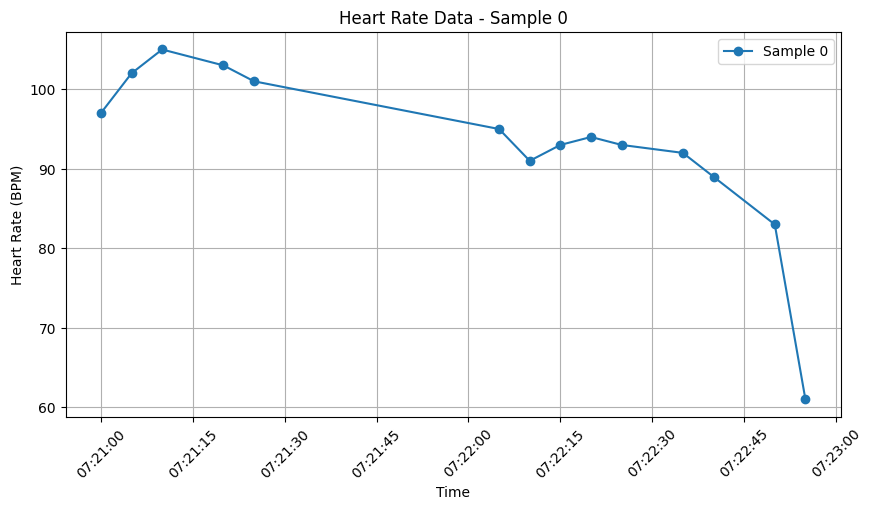

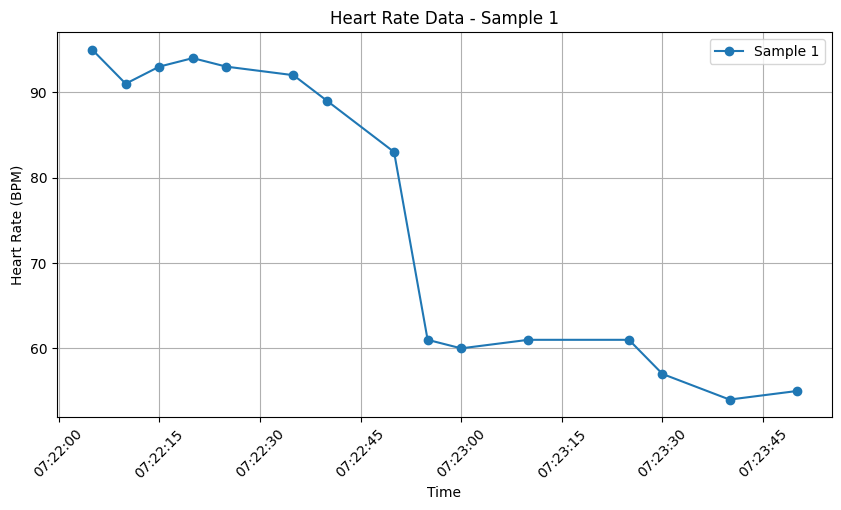

In [ ]:
import matplotlib.pyplot as plt

def plot_sample(sample, sample_index=0):
    """
    Plots a given heart rate sample.

    Parameters:
        sample (DataFrame): A DataFrame containing a 2-minute heart rate sample.
        sample_index (int): The index of the sample for title reference (default: 0).

    Returns:
        None
    """
    if sample.empty or "Time" not in sample.columns:
        print(f"Sample {sample_index} is empty or missing 'Time' column.")
        return

    # Sort by time to ensure proper plotting
    sample = sample.sort_values("Time")

    # Plot
    plt.figure(figsize=(10, 5))
    # Changed 'HeartRate' to 'Value'
    plt.plot(sample["Time"], sample["Value"], marker="o", linestyle="-", label=f"Sample {sample_index}")

    # Formatting
    plt.xlabel("Time")
    plt.ylabel("Heart Rate (BPM)")
    plt.title(f"Heart Rate Data - Sample {sample_index}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage:
plot_sample(samples[0], sample_index=0)
plot_sample(samples[1], sample_index=1)

##### Create 60 minuits samples:

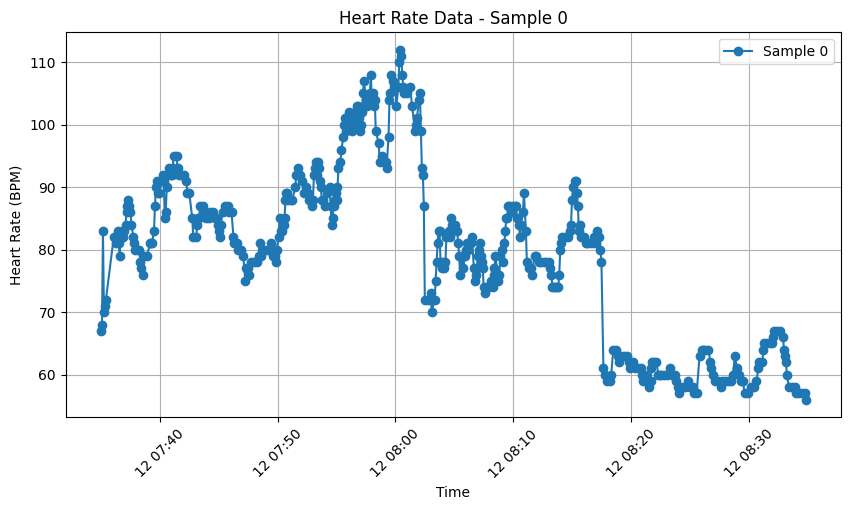

In [ ]:
import pandas as pd

def create_samples(segments, sample_duration='60min', overlap='30min'):
    """
    Creates time-based samples from continuous heart rate segments.

    Parameters:
        segments (list): List of DataFrames, each representing a continuous segment.
        sample_duration (str): Duration of each sample (default: '60min').
        overlap (str): Overlap between consecutive samples (default: '30min').

    Returns:
        list: A list of DataFrames, each representing a sample of specified duration.
    """
    all_samples = []
    sample_duration_td = pd.Timedelta(sample_duration)
    overlap_td = pd.Timedelta(overlap)

    for segment in segments:
        if segment.empty or 'Time' not in segment.columns:
            continue  # Skip empty or malformed segments

        # Convert 'Time' to datetime if necessary
        if not pd.api.types.is_datetime64_any_dtype(segment["Time"]):
            segment["Time"] = pd.to_datetime(segment["Time"], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

        # Drop rows with invalid timestamps
        segment = segment.dropna(subset=["Time"])

        # Ensure segment has enough data
        if len(segment) < 10:
            continue

        # Calculate segment duration
        segment_start = segment["Time"].min()
        segment_end = segment["Time"].max()
        segment_duration_seconds = (segment_end - segment_start).total_seconds()

        # Skip segments shorter than the sample duration
        if segment_duration_seconds < sample_duration_td.total_seconds():
            continue

        # Calculate number of samples
        num_samples = int((segment_duration_seconds - sample_duration_td.total_seconds()) / overlap_td.total_seconds()) + 1

        # Extract samples using a sliding window
        for i in range(num_samples):
            start_time = segment_start + i * overlap_td
            end_time = start_time + sample_duration_td
            sample = segment[(segment["Time"] >= start_time) & (segment["Time"] < end_time)]

            if len(sample) >= 10:  # Ensure sample has sufficient data points
                all_samples.append(sample)

    return all_samples

# Example usage:
# continuous_segments = extract_continuous_segments(df_p1_day20160412)
# samples = create_samples(continuous_segments, sample_duration='60min', overlap='30min')

# Accessing extracted samples:
samples[0]  # First 60-minute sample
samples[1]  # Second 60-minute sample, etc.
samples = create_samples(continuous_segments, sample_duration='60min', overlap='30min')
plot_sample(samples[0], sample_index=0)  # Plot first 60-minute sample


 Generate 1 hour samples for all people:

## Generating samples:

### Generating 1 hour samples for all people:

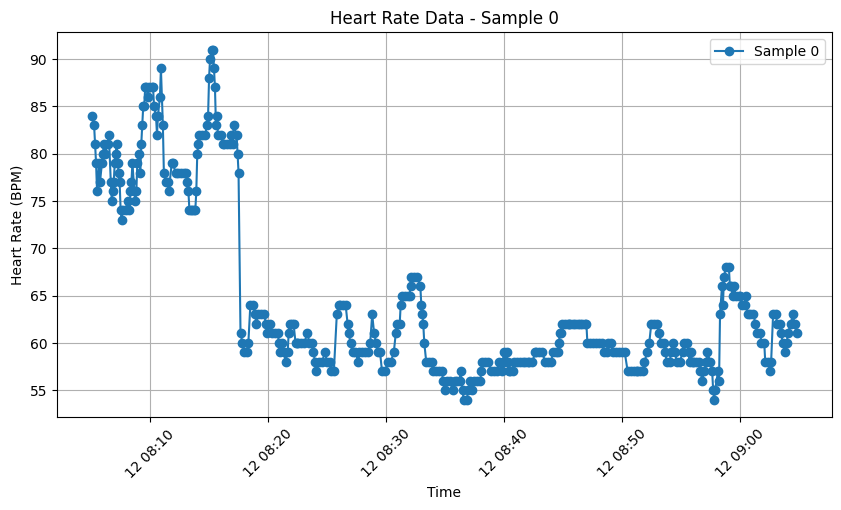

In [ ]:
import pandas as pd

def generate_all_samples(data_by_person, sample_duration='60min', overlap='30min'):
    """
    Generates 1-hour samples for all individuals.

    Parameters:
        data_by_person (dict): Dictionary where keys are person IDs and values are DataFrames.
        sample_duration (str): Duration of each sample (default: '60min').
        overlap (str): Overlap between consecutive samples (default: '30min').

    Returns:
        dict: A dictionary where keys are person IDs and values are lists of 1-hour samples.
    """
    all_samples = {}

    for person_id, df in data_by_person.items():
        # Extract continuous segments for this individual
        continuous_segments = extract_continuous_segments(df)

        # Generate 1-hour samples
        samples = create_samples(continuous_segments, sample_duration=sample_duration, overlap=overlap)

        # Store samples in dictionary
        all_samples[person_id] = samples

    return all_samples

# Example Usage:
# Assume `data_by_person` is a dictionary with 14 people’s data as DataFrames
# data_by_person = {
#     "person_1": df_p1,
#     "person_2": df_p2,
#     ...
#     "person_14": df_p14
# }
data_by_person = {f"person_{i}": globals()[f"p{i}_df"] for i in range(1, 15)}

all_samples = generate_all_samples(data_by_person, sample_duration='60min', overlap='30min')

# Example: Access and plot the first sample of person 1
plot_sample(all_samples["person_1"][1], sample_index=0)


Generate everything:

In [ ]:
import os

# Define the output directory in Google Drive
output_dir = "/content/drive/MyDrive/heart_rate_samples"
os.makedirs(output_dir, exist_ok=True)

# Generate all possible 1-hour samples for all people
all_samples = generate_all_samples(data_by_person, sample_duration='60min', overlap='30min')

# Save each person's samples as CSV files
for person_id, samples in all_samples.items():
    person_dir = os.path.join(output_dir, person_id)
    os.makedirs(person_dir, exist_ok=True)

    for i, sample in enumerate(samples):
        sample_file = os.path.join(person_dir, f"sample_{i}.csv")
        sample.to_csv(sample_file, index=False)

print(f"✅ All samples saved to: {output_dir}")


✅ All samples saved to: /content/drive/MyDrive/heart_rate_samples


# Visualization of the data:

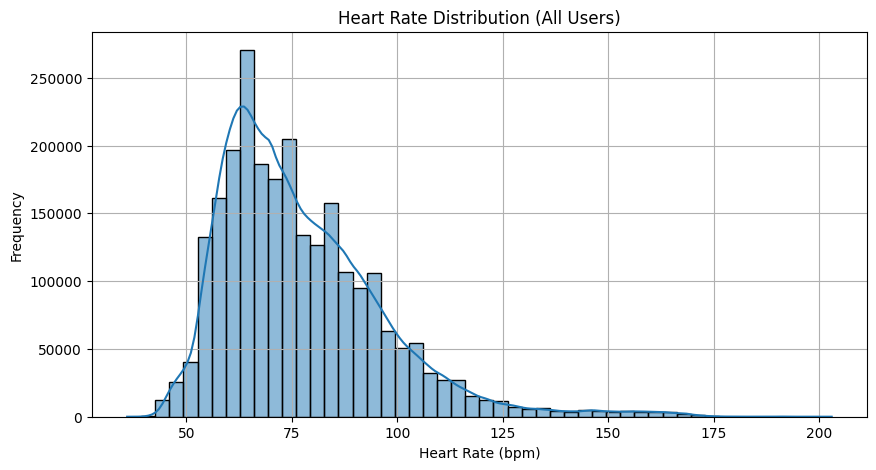

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = heartrate_df.copy()
plt.figure(figsize=(10,5))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title("Heart Rate Distribution (All Users)")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


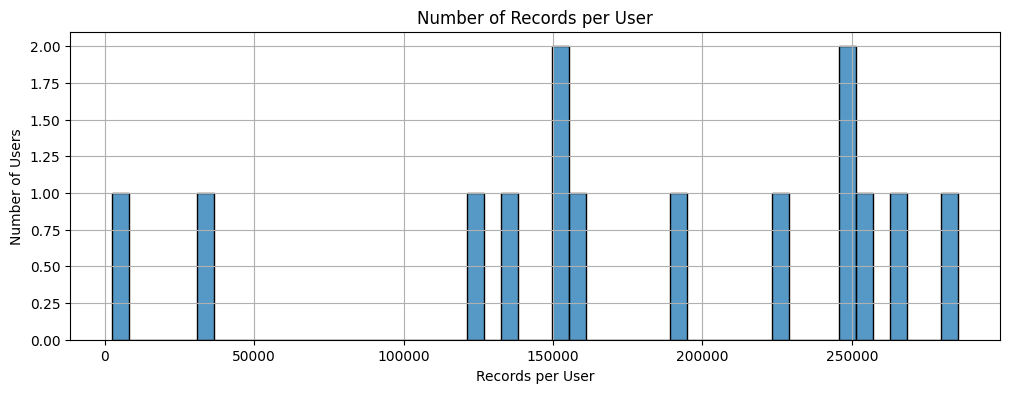

In [ ]:
top_users = df['Id'].value_counts()

plt.figure(figsize=(12,4))
sns.histplot(top_users, bins=50)
plt.title("Number of Records per User")
plt.xlabel("Records per User")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()


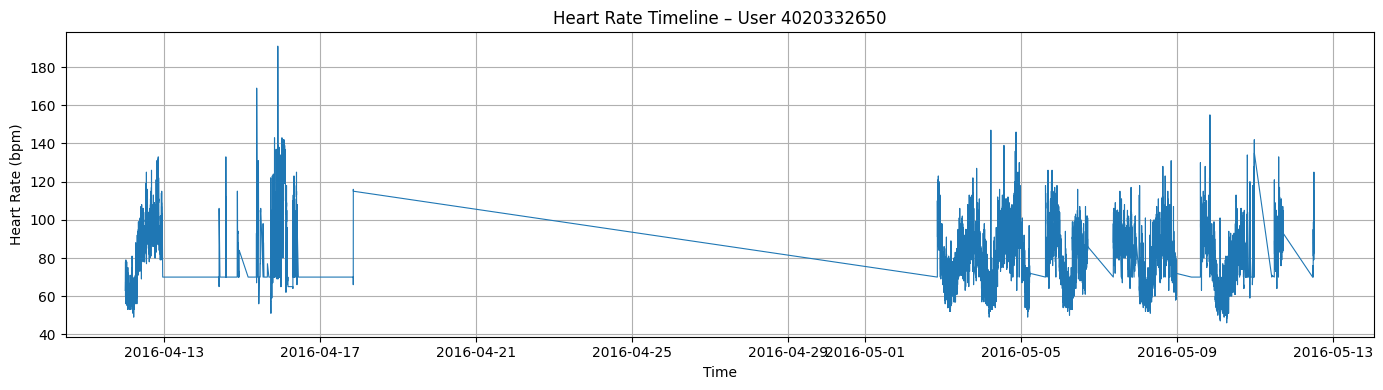

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

sample_id = df['Id'].value_counts().index[0]
sample_user = df[df['Id'] == sample_id]

plt.figure(figsize=(14,4))
plt.plot(sample_user['Time'], sample_user['Value'], linewidth=0.8)
plt.title(f"Heart Rate Timeline – User {sample_id}")
plt.xlabel("Time")
plt.ylabel("Heart Rate (bpm)")
plt.tight_layout()
plt.grid(True)
plt.show()


#### Shows for each person when he was sampled

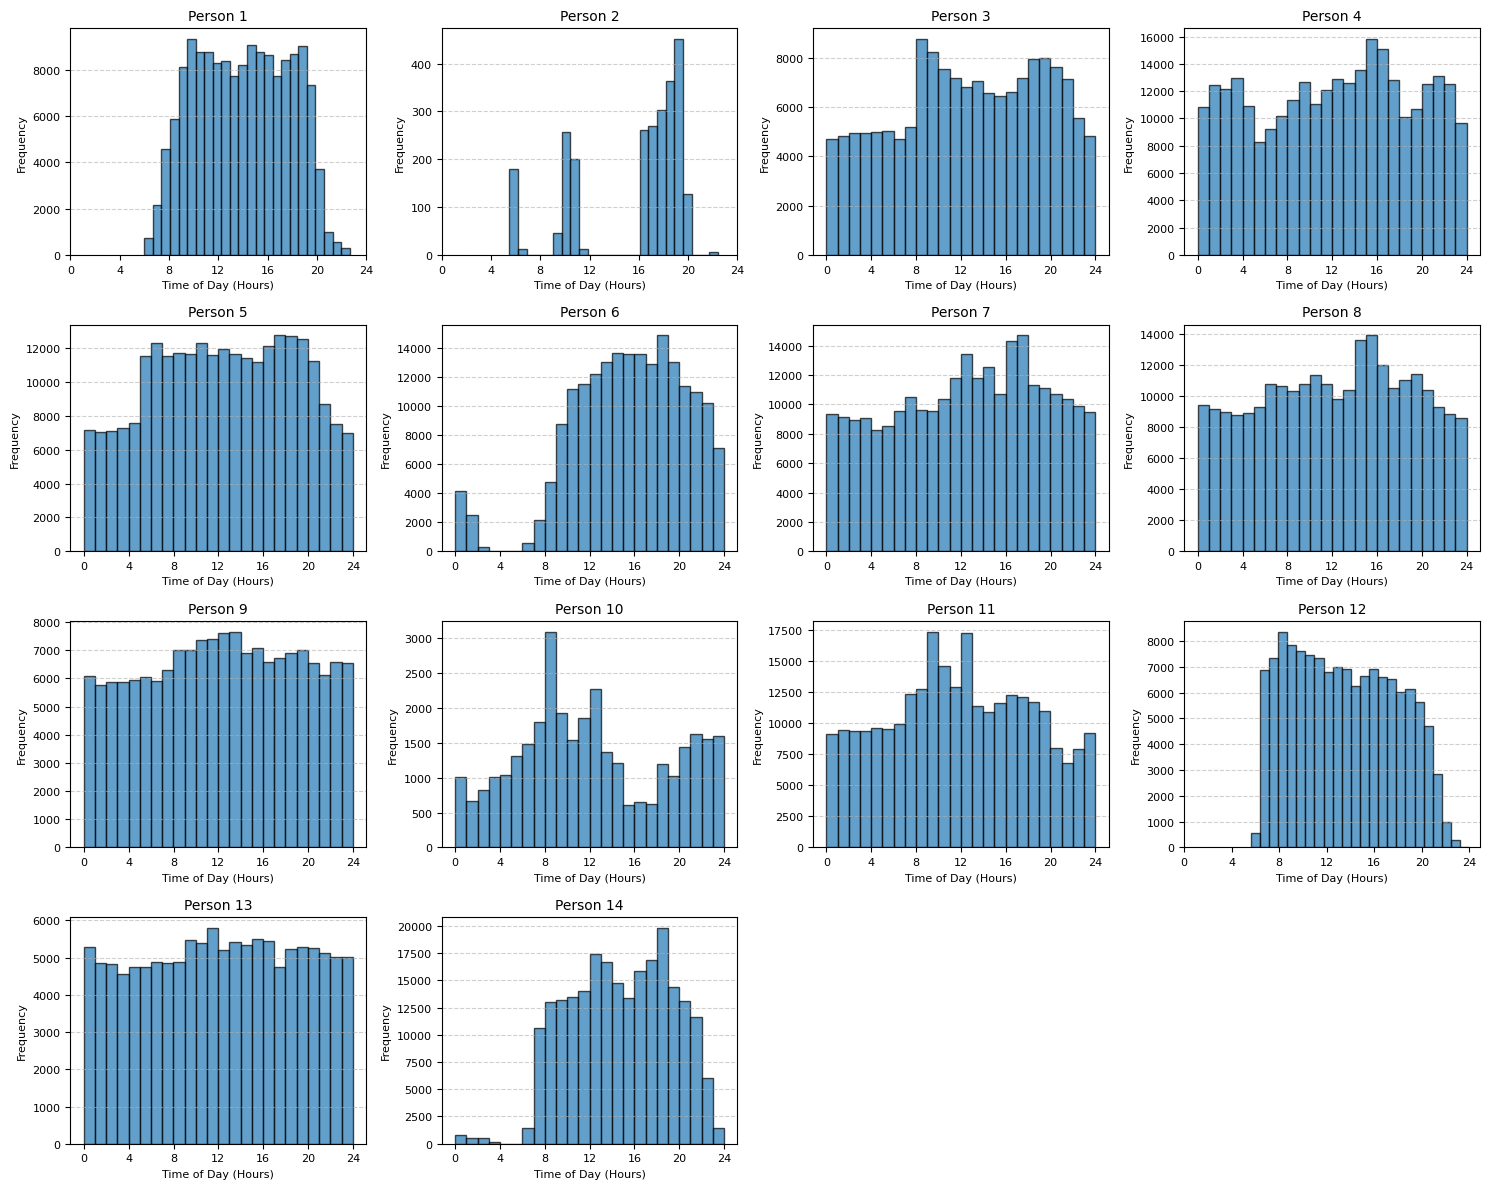

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Time' column is in datetime format
heartrate_df["Time"] = pd.to_datetime(heartrate_df["Time"])

# Sort by Id and Time to ensure correct ordering
heartrate_df = heartrate_df.sort_values(by=["Id", "Time"])

# Get unique IDs
unique_ids = heartrate_df["Id"].unique()

# Set up subplots in a grid
num_ids = len(unique_ids)
cols = 4  # Number of columns in the grid
rows = -(-num_ids // cols)  # Ceiling division to determine rows

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()  # Flatten to handle non-square grids easily

# Plot histogram for each person
for i, id_val in enumerate(unique_ids):
    person_df = heartrate_df[heartrate_df["Id"] == id_val]

    # Convert time to hours for better readability in histogram
    time_hours = person_df["Time"].dt.hour + person_df["Time"].dt.minute / 60

    axes[i].hist(time_hours, bins=24, edgecolor="black", alpha=0.7)  # 24 bins for hours of the day
    axes[i].set_xlabel("Time of Day (Hours)", fontsize=8)
    axes[i].set_ylabel("Frequency", fontsize=8)
    axes[i].set_title(f"Person {i+1}", fontsize=10)
    axes[i].set_xticks(range(0, 25, 4))  # Label x-axis in 4-hour intervals
    axes[i].tick_params(axis='both', which='major', labelsize=8)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)

# Hide any empty subplots if num_ids < rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### plots the signals

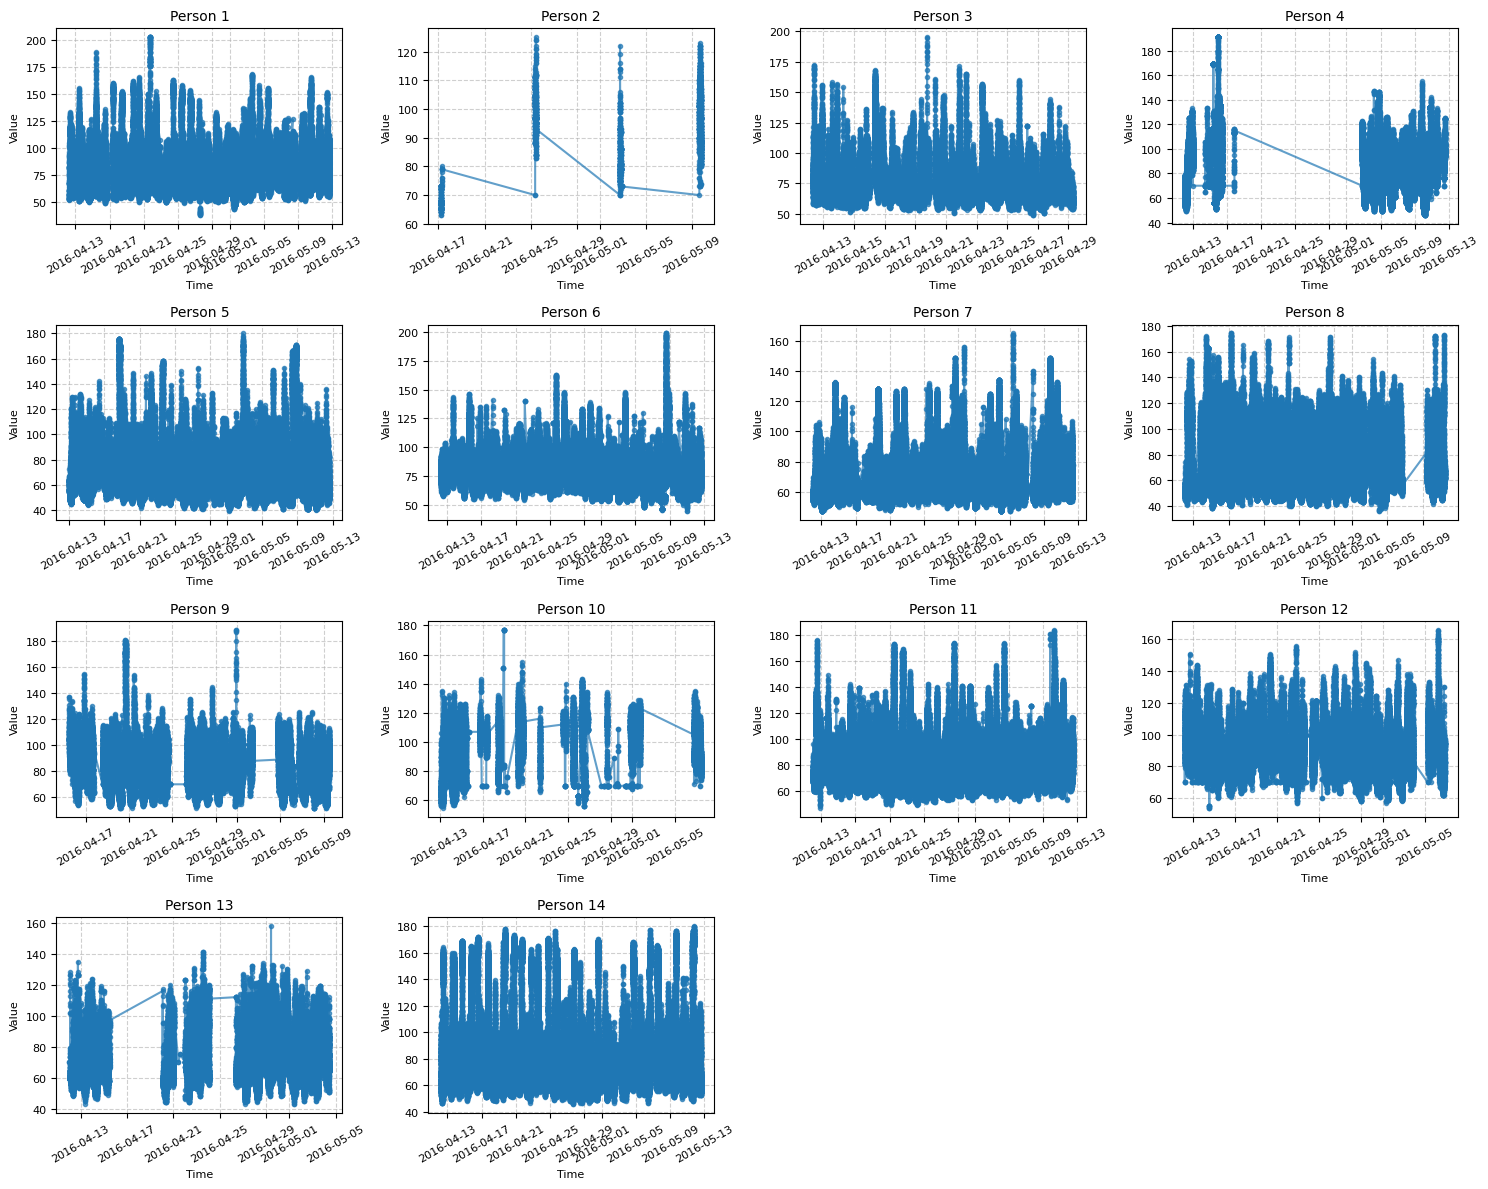

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Time' column is in datetime format
heartrate_df["Time"] = pd.to_datetime(heartrate_df["Time"])

# Sort by Id and Time to ensure correct ordering
heartrate_df = heartrate_df.sort_values(by=["Id", "Time"])

# Get unique IDs
unique_ids = heartrate_df["Id"].unique()

# Set up subplots in a grid
num_ids = len(unique_ids)
cols = 4  # Number of columns in the grid
rows = -(-num_ids // cols)  # Ceiling division to determine rows

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()  # Flatten to handle non-square grids easily

# Plot signal for each person
for i, id_val in enumerate(unique_ids):
    person_df = heartrate_df[heartrate_df["Id"] == id_val]

    axes[i].plot(person_df["Time"], person_df["Value"], marker="o", linestyle="-", markersize=3, alpha=0.7)
    axes[i].set_xlabel("Time", fontsize=8)
    axes[i].set_ylabel("Value", fontsize=8)
    axes[i].set_title(f"Person {i+1}", fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)
    axes[i].grid(True, linestyle="--", alpha=0.6)

    # Improve readability of time labels
    axes[i].tick_params(axis='x', rotation=30)

# Hide any empty subplots if num_ids < rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Visualises the data**

Simulating an HRV signal